# Machine Learning

## Scikit-Learn

- It is a python machine learning library, built on top of NumPy, SciPy, and Matplotlib. It helps us build machine learning models to make predictions or learn patterns from data.

### Scikit-Learn Workflow

1. Get the data ready
2. Choose the right estimator/algorithm for our problems (pick a model)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

In [174]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [175]:
#Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y labels (labels)
y = heart_disease["target"]

In [176]:
#Our problem is classification problem
## 2.Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #instantiate the classifier

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [177]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [178]:
clf.fit(X_train, y_train) #fit the model to the training data

RandomForestClassifier()

In [179]:
#make a prediction
y_preds = clf.predict(X_test)

In [180]:
y_test

126    1
34     1
239    0
56     1
157    1
      ..
281    0
212    0
283    0
165    0
140    1
Name: target, Length: 61, dtype: int64

In [181]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [182]:
clf.score(X_test, y_test)

0.819672131147541

In [183]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [184]:
confusion_matrix(y_test, y_preds)

array([[20,  8],
       [ 3, 30]])

In [185]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [186]:
# 5. Improve the model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")


Trying model with 10 estimators...
Model accuracy on test set: 86.89%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 88.52%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [187]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [188]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

#### 1. Getting your data ready

- Three main things we have to do

1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical data to numerical data (also called feature encoding)

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [190]:
# 1. Split the data into training and test sets
X = heart_disease.drop("target", axis=1) #axis=1 is columns
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [191]:
X_train.shape

(242, 13)

In [192]:
# 1.1 Make sure it's all numerical
## We will use the car sales data set because in the heart disease dataset everything was numerical. In car sales dataset, we will try to predict the price of the car

car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [193]:
#car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)
#car_sales["Price"] = car_sales["Price"] / 100


Before we run a machine learning model, we have to convert the categorical variables to numbers.

In [194]:
#Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [195]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [196]:
#when we ran the above code chunk it gave an error because the car model names are not numerical it is string
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [197]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [198]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [199]:
dummies = dummies.astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [200]:
#let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train);

In [201]:
model.score(X_test, y_test) #this score is normal because my dataset is super small, I am just doing this for exercise

0.3235867221569877

#### 1.2 Handling Missing Values

- There are two main ways
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether --> you will be working with a smaller dataset since you are removing values


In [202]:
car_sales_missing = pd.read_csv('/Users/EfePersonal/Documents/ml-statistics-linear_algebra/notebooks/data_science/data/car-sales-missing-data.csv')

In [203]:
car_sales_missing.isna()

,Make,Colour,Odometer,Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,True,False,False
6,False,True,True,False,False
7,False,False,True,False,True
8,False,False,False,True,True
9,True,False,False,False,False


In [204]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [205]:
#Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [206]:
#Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40 stored elements and shape (10, 16)>

In [207]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


##### Option 1: fill missing data with pandas

In [208]:
##Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

##Fill the "Color" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

## Fill the "Odometer" column
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace=True)

#Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_47086/49639196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_47086/49639196.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [209]:
#Check our dataframe again
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [210]:
#Remove the missing rows in Price

car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
9,missing,White,31600.000000,4.0,"$9,700"


In [211]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)
car_sales_missing["Price"] = car_sales_missing["Price"] / 100

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_47086/3227874550.py:1: SyntaxWarning: invalid escape sequence '\$'
  car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)


In [212]:
len(car_sales_missing)

8

In [213]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [214]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.50043000e+05, 4.00000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 8.78990000e+04, 5.00000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.23026667e+04, 7.00000000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.000

##### Option 2: Fill missing values with Scikit-Learns

In [215]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [216]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [217]:
car_sales_missing.dropna(subset=["Price"], inplace=True) #drop the rows where price is missing
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [218]:
#Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [219]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [220]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([ #ColumnTransformer applies transformers to columns of an array or pandas DataFrame, and it can take multiple transformers
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)

In [221]:
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [222]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [223]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [224]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [225]:
#Now we've got our data as numbers and filled (no missing values)
#Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test) #because we have a small dataset, the score is not good

0.21990196728583944

**To sum up:** 
- The process of filling missing values is called **imputation**.
- The process of turming of your non-numerical values into numerical values is referred to as feature engineering or feature encoding.


#### 2. Choosing the right estimator/algorithm for our problems

- Scikit-Learn refers to machine learning models and algorithms as **estimators**.
- **Classification problem** - predicting a category (heart disease or not)
    - Sometimes you'll see `clf` (short for classifier) used as classification estimator
- **Regression problem** - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use, learn and not sure what model you should use, refer to the Scikit-Learn machine learning map.
- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

##### 2.1 Picking machine learning model for a regression problem

- We will use the California Housing dataset.
- The target variable is the median house value for California districts expressed in hundreds of thousands of dollars.

In [226]:
#Get California Housing dataset
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing

{'data':        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
 ...       ...       ...       ...  ...       ...       ...        ...
 20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
 20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
 20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
 20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
 20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24
 
 [20640 rows x 8 columns],
 'target': 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422
          ...  
 2063

In [227]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [228]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [229]:
# housing_df = housing_df.drop("MedHouseVal",axis=1)
# housing_df

In [230]:
#we have to split our data first 

#import algorithm

#Setup randomseed
np.random.seed(42)

#Create the data
X= housing_df.drop("target", axis=1)
y = housing_df["target"] #median house value

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Instantiate and fir the model (on the training set)
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)

model.score(X_test, y_test) #the result is called R^2 score

0.5758549611440125

- What if `Ridge` didn't work or the score didn't fit our needs?
- We can try a different model.
- After checking the sklearn model map, for now we decided to trt Ensemble Models

**Ensemble Models** 

- The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability and robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

- In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimators because it's variance is reduced. **Bagging methods, Forest of randomized trees** (random forest is lots of decision trees coming together)

- By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to product a powerful ensemble. **AdaBoost, Gradient Tree Boosting**

- For the next exercise, we decided to use RandomForestRegressor.

- **Random Forest Regressor** - A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole data is used to build each tree.

In [231]:
#implementing RandomForestRegressor

#import the model class from ensemble module
from sklearn.ensemble import RandomForestRegressor

#set up the random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] #median house value

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train) #fit the model to the training data

#Check the score of the model (on the test set)
model.score(X_test, y_test) #the result is called R^2 score

0.8059809073051385

## 2.2 Picking a machine learning model for a classification problem

- I picked the iris dataset from sklearn. It is a dataset to classify iris plants based on their features.

In [232]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading iris dataset
from sklearn.datasets import load_iris
iris = load_iris()



In [233]:
#Setting up the random seed and data as X and y

np.random.seed(42)

X = iris.data
y = iris.target

In [234]:
#Splitting the data into train and test sets and creating the target column in our dataframe
features_names = iris.feature_names
target_names = iris.target_names

iris_df = pd.DataFrame(columns=features_names, data=iris)
iris_df['species'] = [target_names[i] for i in y]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [235]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
model.score(X_test, y_test)



1.0

- Now following the course, I will use the heart disease dataset.

In [236]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Consulting the map and it says to try the `LinearSVC`

In [237]:
#Import LinearSVC estimator class
from sklearn.svm import LinearSVC

#random seed
np.random.seed(42)

#make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate the model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_test, y_test)


0.8688524590163934

- LinearSVC worked well in this case. If it does not work well, you can go and try KNeighborsClassifier or RandomForestClassifier.

- We will skip `KNeighborsClassifier` and experiment with `RandomForestClassifier` because it is an ensemble model and it is a good idea to try ensemble models when you are not sure which model to use.

In [238]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup random seed 
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the RandomForest_Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#evaluate the model RandomForest_Classifier
clf.score(X_test, y_test)


0.8524590163934426

NOTE:
- If you have structured data, use ensemble methods (e.g., tabular data, CSV files, Excel files)
- If you have unstructured data, use deep learning or transfer learning. (e.g., images, text, audio, video)

## 3 Fit the model/algorithm on our data and use it to make predictions

### 3.1. Fitting the model to the data

- `X` = features, features variables, data
- `y` = labels, targets, target variable

In [239]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup random seed 
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the RandomForest_Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data
clf.fit(X_train, y_train)

#evaluate the model RandomForest_Classifier
clf.score(X_test, y_test)


0.8524590163934426

## 3.2. Make predictions using a machine learning model

- 2 ways to make predictions:
1. `predict()` - returns the predicted labels for the input samples
2. `predict_proba()` - returns the probability of the input samples for all classes in the classification problem

In [240]:
# Use a trained model to make predictions
#clf.predict(np.array([1 ,7, 8, 10, 12])) #this doesn't work

In [241]:
clf.predict(X_test) #this works because our model saw the training data

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [242]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

Now, what we've done is we've made predictions on the test data (`X_test`) to predict whether someone or not has heart disease. Now our labels (`y_test`) are in the same format as our test labels, so our predictions are in the same format as our test labels. So we can compare the predictions (`X_test`) to truth (`y_test`) to see how well our model did.

In [243]:
#Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) #this is the accuracy of the model

np.float64(0.8524590163934426)

In [244]:
clf.score(X_test, y_test) #returns the mean accuracy on the given test data and labels

0.8524590163934426

In [245]:
#another way but the same thing to see your accuracy score of your model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) #this is the accuracy of the model

0.8524590163934426

- `predict()` vs. `predict_proba()`

- `predict_proba()` - probability estimates. The returned estimates for all classes are ordered by the label of classes. For a multi_class problem, if multi_class is set to be "multinomial" the softmax function is used to find the predicted probability of each class. Else use a one-vs-rest appraoch, i.e calculate the probability of each class assuming it to be positive eusing the logistic function, and normalize these valules across all classes.

In [246]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])
## predict_proba returns the probabilities of the labels

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [247]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

- In scikit-learn, the .score() method for regression models like RandomForestRegressor calculates the coefficient of determination (R-squared) of the prediction. It's a measure that indicates how well the model predicts the variation in the dependent variable (y) based on the independent variables (X).

- However, `predict()` obtains the model's predictions for the target variable based on the features in the test dataset. **Used to evaluate performance metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE)**.

In [248]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [249]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create random forest model
model = RandomForestRegressor()

#Fit the model to data
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

In [250]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [251]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [252]:
#Compare the predictions to the truth labels
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [253]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

- First you do the predictions with `y_preds`, and then we compare our prediction with the truth labels (`y_test`) to see how well our model did.

## 4. Evaluating a machine learning model

- Three ways to evaluate Scikit-Learn models:
    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

- **Estimator score method:** Estimators have a `score` method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator's documentation.

- **Scoring Parameter:** Model-evaluation tools using **cross-validation** (such as **model_selection.cross_val_score** and **model_selection.GridSearchCV**) rely on internal scoring strategy.

- **Metric Functions:** The **sklearn.metrics** module implements functions assessing prediction error for specific purposes.

- Finally, **Dummy estimators** are useful to get a baseline value of those metrics for random predictions.

In [254]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create classifier model instance
clf = RandomForestClassifier(n_estimators=10)

#Fit the model to the training data
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [255]:
#Score the model with .score() method
## The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)


1.0

In [256]:
clf.score(X_test, y_test)

0.8524590163934426

- **### .score() method returns the mean accuracy on the given test data and labels IN CLASSFICATION** 

- Now we will use the `score()` on our regression problem...

In [257]:
#let's use the housing dataset

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=500)

regressor.fit(X_train, y_train)

regressor.score(X_test, y_test)

0.8083972026151616

- **### .score() method returns coefficient of determination (R^2) of the prediction on the given test data and labels IN REGRESSION**

- Highest score is 1.0 and lowest is 0.0

### 4.2 Evaluating a model using the `scoring` parameter

- When you get further into a problem, it's likely you'll want to start using some more powerful metrics to evaluate the model's performance.

- **Scoring parameter**: Model-evaluation tools using *cross-validation* (such as **model_selection.cross_val_score** and **model_selection.GridSearchCV**) rely on internal scoring strategy.

In [258]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create classifier model instance
clf = RandomForestClassifier(n_estimators=10)

#Fit the model to the training data
clf.fit(X_train, y_train);


In [259]:
clf.score(X_test, y_test)

0.8524590163934426

In [260]:
cross_val_score(clf, X, y, cv=5)

array([0.80327869, 0.8852459 , 0.81967213, 0.75      , 0.71666667])

- In K-Fold Cross-Validation; model is trained on K different versions of training data, and evaluated on K different versions of test data.

- It aims to provide a solution to not training on all the data and avoiding getting those lucky scores on just a single split of data.

- So if we call the `cross_val_score` parameter on only our X_test data and y_test data, it's going to give back a **score for each of the K folds**. So we can get a better idea of how well our model is performing on the data. 
    - And it helps us to figure out a more ideal performance metric or evaluation metric for our model Which means that we can take the average of these K-scores.

In [261]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation-score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8150819672131148))

- In this case, our original score is 0.85, but when we use 5-split, we get a score of 0.82. 

- However, in this case, if you are asked to report the accuracy of your model, even though cross_val_score is lower, you'd prefer the cross validation score over the original score because it is more reliable.

In [262]:
#Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None) #this is the default scoring

array([0.80327869, 0.81967213, 0.85245902, 0.76666667, 0.75      ])

- So, if in cross_val_score, if `scoring=None`, it uses the default scoring parameter of our estimate. In our case, we know it is using accuracy since this is a classifier problem.

#### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report



**1. Accuracy**

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)



In [264]:
#So because the default score parameter of our classifier is the mean accuracy
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [265]:
print(f" Heart Disease Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

 Heart Disease Cross-Validated Accuracy: 82.48%


- Above score explains that in a given sample, that the model hasn't seen before, how likely is it to predict the right label?

**2. Area Under ROC Curve**

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not heart disease).

- `ROC`: Receiver Operating Characteristic. 
    - ROC curve is a comparison of a model's True Positive Rate (TPR) vs. False Positive Rate (FPR). 
    - True Positive Rate (TPR): model predicts 1 when truth is 1 
    - False Positive Rate (FPR): model predicts 1 when truth is 0 
    - True Negative Rate (TNR): model predicts 0 when truth is 0 
    - False Negative Rate (FNR): model predicts 0 when truth is 1

- `AUC`: Area Under Curve
    - The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model with get an AUC score of 1.



In [266]:
#Create X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [267]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

#Make predictions with probability
y_probs = clf.predict_proba(X_test)
y_probs[:10]

## The label on the left is 0 and the label on the right is 1 in the outpu

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.11, 0.89],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [268]:
#Creating the y_probs_positive
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [269]:
#Calculate the fpr, trpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.375  , 0.40625, 0.5    ,
       0.5625 , 0.59375, 0.59375, 0.625  , 0.71875, 0.71875, 0.78125,
       0.84375, 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     ])

- Just looking at an array of numbers doesn't make much sense. That's why we will create the plot for ROC curve to understand.

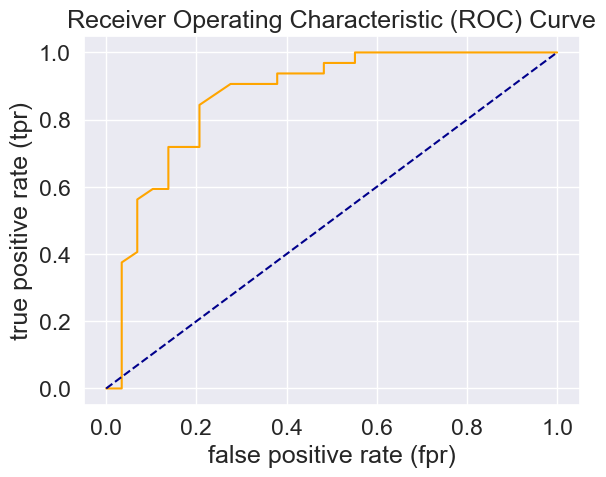

In [270]:
#Create a function for plotting ROC curves

import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (FPR) and true positive rate (TPR)
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color= "darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.show()

plot_roc_curve(fpr, tpr)


In [271]:
#let's look at the AUC score to see how well our model is performing
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8696120689655172)

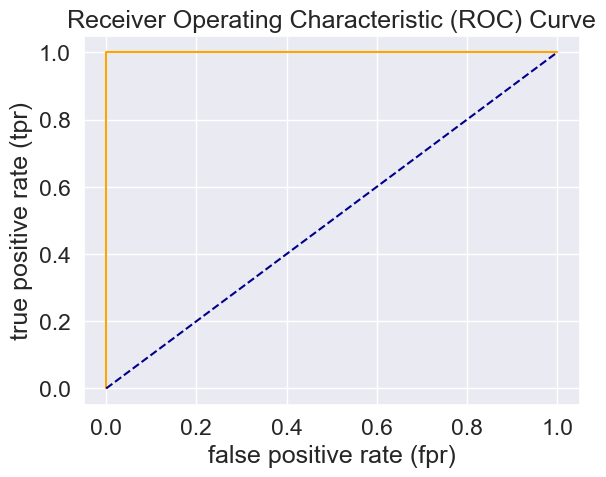

In [272]:
#plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [273]:
#perfect AUC score
roc_auc_score(y_test, y_test)

np.float64(1.0)

- There is not perfect ROC curve or AUC score. If you are getting that, make sure that you are measuring the right thing.

- The main metric you can use to evaluate the performance of a model is not only ROC curve but it is AUC score.

**3. Confusion Matrix**

- It is a quick way to compare the labels a model predicts and the actual labels it was suppose to predict.

- In essence, giving you an idea of where the model is getting confused.

In [274]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [275]:
#Visualize Confusion Matrix with pd.crosstab()
pd.crosstab(y_test, y_preds,
            rownames=["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


- While the `Predicted Label` was 1 but the `Actual Label` 0, there are 7 cases. These are **False Positives**.

- While the `Predicted Label` was 0 but the `Actual Label` 1, there are 7 cases. These are **False Negatives**.

<Axes: >

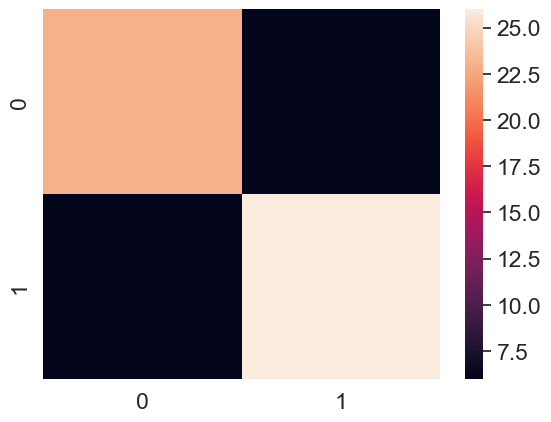

In [276]:
#Make our confusion matrix more visual and appealing with Seaborn's Heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
confusion = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(confusion)



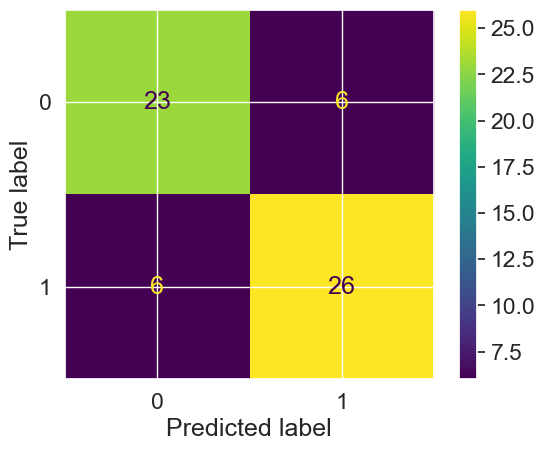

In [277]:
from sklearn.metrics import ConfusionMatrixDisplay #overall class

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)



- There is two different methods here one is `ConfusionMatrixDisplay.from_estimator` and the other one is `ConfusionMatrixDisplay.from_predictions`.

- The difference is that `from_predictions` takes y_true and y_pred as arguments, so there is no estimator. This means that you have to have predictions ready to go. 

- `ConfusionMatrixDisplay_from_estimator` takes the confusion matrix as an argument. Whereas in here, you can pass the estimator and the test data and the test labels. So it will calculate the confusion matrix for you.

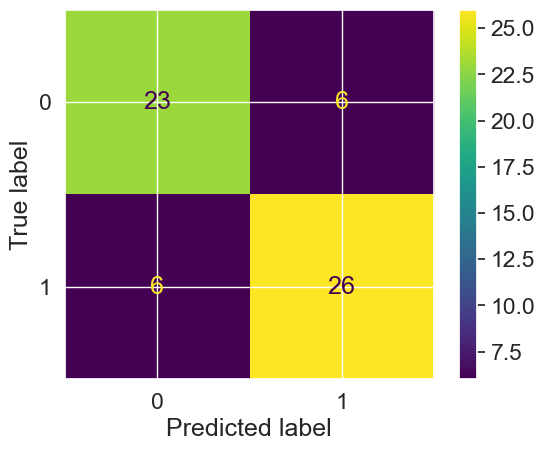

In [278]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [279]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



**4. Classification Report**

- A classification report is also a collection of different evaluation metrics rather than a single one.

- It is a summary of the precision, recall, f1-score and support for each class.

- **Precision**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0 - **True Positive Rate**

- **Recall**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0 

- **F1 Score**: A combination of precision and recall. A perfect model achieves an F1 score of 1.0

- **Support**: The number of samples each metric was calculated on.

- **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0

- **Macro Average**: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into account, so if you do have class imbalances, pay attention to this metric.

- **Weighted Average**: The weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g., will give a high value when one class outperforms anothe due to having more samples).

--> **Class Imbalances**: When you have imbalanced clas 0 or class 1. For example if we have 60 examples of class 0 and 2 examples of class 1, this is a class imbalance.

- So we learnt couple of evaluation metrics above. How can we decide which one to use?

In [280]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/EfePersonal/Documents/ml-statistics-linear_algebra/notebooks/machine_learning/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/EfePersonal/Documents/ml-statistics-linear_algebra/notebooks/machine_learning/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/EfePersonal/Documents/ml-statistics-linear_algebra/notebooks/machine_learning/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


- Because we have only 1 class 1, and 9999 class 0, as you can see the accuracy is 99.99% but the model is not doing a good job at all. It is just predicting 0 all the time.

- So, that's why it is important to check a wide spectrum of evaluation metrics to get a better idea of how well your model is performing.

#### 4.2.2 Regression model evaluation metrics

- The ones we are going to focus:

1. R^2 (R squared) or coefficient of determination: is the proportion of the variation in the dependent variable that is predictable from the independent variable.

2. Mean Absolute Error (MAE): The average of the absolute differences between the predicted values and the actual values. **It tells you on average how much you predictions deviate from the actual values.**
    - Example: If you're predicting house prices in $1000s, and MAE = 2.5, it means your predictions are off by $2,500 on average.

3. Mean Squared Error (MSE): The average of the squared differences between predicted and actual values. **It shows how far predictions are far from actual values, but *squared the errors*, penalizing larger errors more heavily.** Units are squared compared to the original target.
    - Example: If target is in $1000s and MSE = 9, your typical squared error is $9,000² = $81,000,000, but it’s more meaningful to take the square root (→ RMSE).


NOTE:
- MAE is more robust to outliers, gives a straightforward average error.

- MSE gives more weight to large errors, which can be useful if you want to penalize big mistakes more.


In [281]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [282]:
model.score(X_test, y_test)

0.8059809073051385

In [283]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [284]:
y_test.mean()

np.float64(2.0550030959302323)

In [285]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())


In [286]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [287]:
r2_score(y_test, y_test_mean)

0.0

- If your model is performing pretty poorly, it's going to get another to score of zero or negative.

In [288]:
r2_score(y_test, y_test)

1.0

- So, this is a quick way to check how well it's doing at predicting the target value from the features.

- Now, we will use the `mean absolute error` and `mean squared error` to evaluate our model. To use these kind of metrics, we need to make predictions on our model with `model.predict`

In [289]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Mean Squared Error and Mean Absolute Error

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

model.score(X_test, y_test)




0.8059809073051385

In [290]:
y_preds = model.predict(X_test)

**Mean Squared Error**

- Mean of the squared errors between the predicted values and the actual values.
- The lower the MSE, the better the model is at predicting the target value.
-  When we square the differences, we're going to amplify values that are larger. Whereas main absolute error keeps everything on the same scale.

In [291]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [292]:

mse_df = pd.DataFrame(data={"actual values": y_test,
                            "predicted values": y_preds})
mse_df['differences'] = mse_df["actual values"] - mse_df["predicted values"]
mse_df['squared differences'] = np.square(mse_df["differences"])
mse_df.head(10)

,actual values,predicted values,differences,squared differences
20046,0.47700,0.490580,-0.013580,0.000184
3024,0.45800,0.759890,-0.301890,0.091138
15663,5.00001,4.935016,0.064994,0.004224
20484,2.18600,2.558640,-0.372640,0.138861
9814,2.78000,2.334610,0.445390,0.198372
13311,1.58700,1.658080,-0.071080,0.005052
7113,1.98200,2.342370,-0.360370,0.129867
7668,1.57500,1.667080,-0.092080,0.008479
18246,3.40000,2.560960,0.839040,0.703988
5723,4.46600,4.851978,-0.385978,0.148979


In [293]:
squared_differences = np.square(mse_df['differences']).mean()
squared_differences

np.float64(0.2542443610174998)

**Mean Absolute Error (MAE)**

- MAE is the average of the absolute differences between predictions and actual values.
- It gives you an idea of how wrong your models' predictions are.
- Also, MAE will give you the value in the same unit as the target variable.

In [294]:
#Mean Absolute Error
mae = mean_absolute_error(y_test, y_preds)
mae

0.3270458119670544

In [295]:
# to see the differences between our actual values and predicted values, I am going to create a new dataframe with the columns of actual values and predicted values

mae_df = pd.DataFrame(data={"actual values": y_test,
                            "predicted values": y_preds})
mae_df['differences'] = mae_df["actual values"] - mae_df["predicted values"]
mae_df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,-0.013580
3024,0.45800,0.759890,-0.301890
15663,5.00001,4.935016,0.064994
20484,2.18600,2.558640,-0.372640
9814,2.78000,2.334610,0.445390
13311,1.58700,1.658080,-0.071080
7113,1.98200,2.342370,-0.360370
7668,1.57500,1.667080,-0.092080
18246,3.40000,2.560960,0.839040
5723,4.46600,4.851978,-0.385978


In [296]:
np.abs(mae_df["differences"]).mean() #same number as our MAE

np.float64(0.3270458119670544)

**Which Regression Metric Should You Use?**

- R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

- **MAE** gives a better indication of how far off each of your model's predictions are on average.

- As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are)

    - Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off.
    - Pay more attention to MSE: When being 10,000 off is more than twice as bad as being 5.000 off.

#### 4.2.3 Finally using the scoring parameter

- Model-evaluation tools using **cross-validation** (such as **model_selection.cross_val_score** and **model_selection.GridSearchCV**) rely on internal scoring strategy. 

In [297]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [298]:
np.random.seed(42)

#Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) #If None, the estimator's default scorer is used. Which is accuracy for classification

In [299]:
#Cross-Validated Accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [300]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [301]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

- So, depending on the split of the data, our model performs better on one split than another. So, this is the value of cross-validation, if you have enough data to do it again.

In [302]:
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 83.30%


In [303]:
#Recall
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [304]:
#Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 85.45%


- Let's see the scoring parameter that can be used for regression problem. 

In [305]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)


In [306]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

np.float64(0.6516423891480653)

In [307]:
cv_r2

array([0.51648146, 0.70255896, 0.74089371, 0.61492293, 0.68335489])

- In this cases, normally the lower the value the better for MAE and MSE. However, in the cases below, because it is negated it is a negative value, so the higher the value the better.

In [308]:
#mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54075823, -0.41178895, -0.43917783, -0.46167312, -0.47363995])

In [309]:
np.mean(cv_mae)

np.float64(-0.46540761555717064)

In [310]:
#Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.52541945, -0.34494067, -0.37219051, -0.44454336, -0.46349669])

In [311]:
np.mean(cv_mse)

np.float64(-0.43011813606943294)

### 4.3 Using Different Evaluation Metrics as Scikit-Learn Functions

- 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module.

In [312]:
#CLASSIFICATION EXAMPLE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
#Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create the model
clf = RandomForestClassifier(n_estimators=100)

#Fit the model
clf.fit(X_train, y_train)

#Predict your model
y_preds = clf.predict(X_test)


#Evaluate the model using evaluation functions
print("Classifier metrics on test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_preds)*100:.2f}%")



Classifier metrics on test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1 Score: 86.15%


In [313]:
#REGRESSION EXAMPLE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)
#Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create the model
regressor = RandomForestRegressor(n_estimators=100)

#Fit the model
regressor.fit(X_train, y_train)

#Make predictions
y_preds_reg = regressor.predict(X_test)

#Evaluate the model using evaluation functions
print("Regression metrics on test set")
print(f"R^2 score: {r2_score(y_test, y_preds_reg)}")
print(f"Mean Absolute error: {mean_absolute_error(y_test, y_preds_reg)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds_reg)}")


Regression metrics on test set
R^2 score: 0.8059809073051385
Mean Absolute error: 0.3270458119670544
Mean Squared Error: 0.2542443610174998


- So; what's the difference between `cross_val_score` and `sklearn_metrics` is that `sklearn_metrics` are found on **one** train test split vs. the `cross_val_score` are found on multiple train and test splits using cross validation. `cross_val_score` is a better indication of how well your model is performing on the unseen data.

## 5. Improving a Model

- First predictions = baseline predictions
- First model = baseline model

From a data perspective, you can improve a model by:
* Could we collect more data? 
* Could we improve our data? (e.g., fill in missing values, remove outliers, etc., more feature engineering)

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs parameters
* **Parameters = model finds these patters in the data**
* **Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.**

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [314]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)


In [315]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

* Hyperparameter tuning introduces a third set, a validation set. 
For example, we are starting with a data set of 100 samples. We will split it to 3 sets: training, test and validation. The model gets trained on the `training split`, validated on the `validation split` and tested on the `test split`.

* `Validation set` is used to tune the hyperparameters of the model. And then finally as normal a model gets evaluated on the `test split`

In [316]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* We're going to try and adjust:
    * `max_depth`
    * `max_features`
    * `min_samples_split`
    * `n_estimators`

In [317]:
def evaluate_preds(y_true, y_preds):
    """
    Peforms evaluation comparsion on y_true labels vs. y_pred labels on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"Accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1: {f1:.2f}%")

    return metric_dict

- We will need to split the data to train, test and validation by hand.

In [318]:
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split the data into train, validation and test
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [319]:
clf = RandomForestClassifier()
clf.get_params() #baseline params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [320]:
# Fit the model to the training data
clf.fit(X_train, y_train)

#Make baseline predictions
y_preds = clf.predict(X_valid) #we want to predict on the validation set because we want to tune our model on validation split

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Accuracy: 82.22%
Precision: 0.81%
Recall: 0.88%
F1: 0.85%


{'Accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [321]:
np.random.seed(42)
#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

#Make Predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Accuracy: 80.00%
Precision: 0.83%
Recall: 0.80%
F1: 0.82%


In [322]:
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)

clf_3.fit(X_train, y_train)

#Make Predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

#Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 82.22%
Precision: 0.81%
Recall: 0.88%
F1: 0.85%


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [323]:
from sklearn.model_selection import RandomizedSearchCV

#dictionary of hyperparameters to search
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate the model
clf = RandomForestClassifier(n_jobs=1) #how much of your computer's processing power you want to use, -1 means all of it

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of different combinations to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV model to the training data
rs_clf.fit(X_train, y_train);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimator

- Once finishing the fit method, you can call the `best_params_` attribute to see the best hyperparameters found by the search.

In [324]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

- And now, when we call `predict` on our randomized search classifier by default, it's going to use the `best_params` hyperparameters found by the search.
- So, instead of finding these by hand, RandomizedSearchCV has found them for us.

In [325]:
#Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)



Accuracy: 81.97%
Precision: 0.77%
Recall: 0.86%
F1: 0.81%


### 5.3 Hyperparameter tuning with GridSearchCV

- In RandomizedSearchCV what we did was we defined a space or a dictionary of different hyperparameters we wanted to search through. Then RandomizedSearchCV combined these parameters at random and built a classifier with different settings and evaluated the model using cross-validation.

- In a normal workflow, when you are tuning hyperparameters you would start trying by hand, and then using RandomizedSearchCV across a space of hyperparameters, and then finally using GridSearchCV to exhaustively search through a space of hyperparameters.

- What we can do when we are using GridSearchCV is we can take the `best_params` parameters and force the new dictionary of hyperparameters to look similar to that. Because with the whole dictionary of hyperparameters, it can take a long time to search through all of them. So, we are creating a smaller dictionary of hyperparameters to search through.

In [326]:
grid_2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "max_features": ["sqrt"],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2]
}

In [327]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate the model
clf = RandomForestClassifier(n_jobs=1) #how much of your computer's processing power you want to use, -1 means all of it

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid,
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV model to the training data
gs_clf.fit(X_train, y_train);



Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

In [328]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [329]:
gs_y_preds = gs_clf.predict(X_test)

#Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97%
Precision: 0.73%
Recall: 0.96%
F1: 0.83%


- Let's compare our different models metrics

In [330]:
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})

<Axes: >

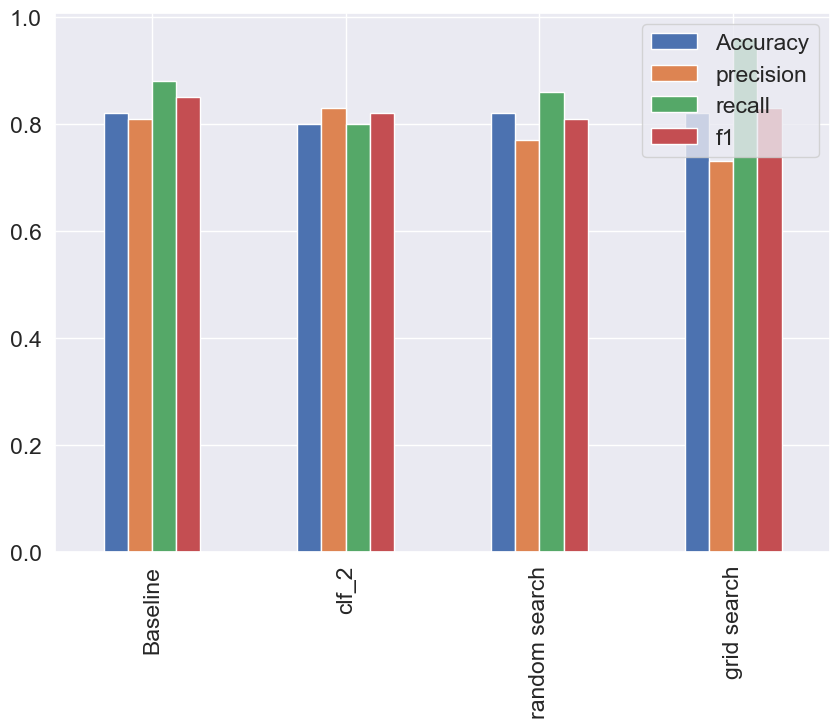

In [334]:
compare_metrics.T.plot.bar(figsize=(10, 7))

**NOTE**

- When comparing models, you should be careful to make sure they're compared on the same splits of data.
- The most important part is they all use the same data splits created using `train_test_split()`, and `np.random.seed(42)` to ensure reproducibility.

## 6. Savind and Loading Trained Machine Learning Models

- Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [337]:
#Save an existing model to file
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))


In [338]:
#load the model from file
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [339]:
#make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)

In [340]:
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 81.97%
Precision: 0.73%
Recall: 0.96%
F1: 0.83%


{'Accuracy': 0.82, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

**JobLib**

In [341]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [343]:
#Import a saved joblib model
loaded_joblib_model = load("gs_random_forest_model_1.joblib")

In [344]:
#make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)

In [345]:
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 81.97%
Precision: 0.73%
Recall: 0.96%
F1: 0.83%


{'Accuracy': 0.82, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

- So, which one should you use? 

- **Joblib** is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string.

## 7. Putting all together

- To tidy things up we will be using the pipeline class of scikit-learn.

- `Pipeline` - The purpose of a the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '_'. 

In [346]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [347]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [348]:
#we want to use these columns to predict the price of the car
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [350]:
#we have to make sure that all the columns are in numerical format before we can build a machine learning model
##also we need to check our null values
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

* 1. We need to fill the missing data
* 2. Convert the data to numbers
* 3. build the machine learning model on it

In [353]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Set up random seed
np.random.seed(42)

#Import data the data, drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#We're going to start to define the different features of the data
##and the different transformer pipelines that we want to take place on that data

#Define the different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#Set-up preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ]
)

#Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())])

# Split the data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

* It's also possible to use `GridSearchCV`, or `RandomizedSearchCV` with our pipeline.

In [355]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"], #with the new version of scikit-learn, sqrt is enough for max_features
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, 
                        param_grid=pipe_grid,
                        cv=5,
                        verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [356]:
gs_model.score(X_test, y_test)

0.2848784564026805

We've completed the Scikit-Learn workflow, and now we can use it to build machine learning models on our own datasets.
# Scikit-Learn Workflow Summary
1. **Get the data ready**: Split into features and labels, handle missing values, convert categorical data to numerical.
2. **Choose the right estimator/algorithm**: Pick a model based on the problem type (classification or regression).
3. **Fit the model to the data**: Train the model using the training data.
4. **Make predictions**: Use the trained model to predict labels for new data.
5. **Evaluate the model**: Use metrics like accuracy, R-squared, MAE, MSE, etc., to assess model performance.
6. **Improve through experimentation**: Adjust hyperparameters, try different models, or collect more data to enhance performance.
7. **Save and reload your trained model**: Use `pickle` or `joblib` to save the model for future use.
